## NYC Shootings Analysis

Shootings in America have become a growing problem, as a NYC resident I wanted to know the situation of shooting incidents in my city. I found a NYC public dataset that contained information on all reported shootings in NYC from 2005-2022 which was perfect for my goal.

In [199]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [200]:
#connecting to sqlite3 database
connection=sqlite3.connect('../../databases/nyc_shootings_db')

### Overview of the Data

I have cleaned the dataset, and filtered out the data to only contain the last 6 recent years 2017-2022. I have transformed the data into two different tables that are stored in a sqlite3 database: Shootings and Incidents. Look at the data cleaning and database setup sections of the repo to see the whole process.

#### Shootings Table

The shootings table gives info on the victim and perpetrator demographics of all the reported shootings that have occurred in NYC. Each row in the table represents one singular shooting where one perpetrator shoots one victim.

In [201]:
#query to retrieve all the rows and columns from the Shootings table
query='''SELECT *
         FROM Shootings;'''

In [202]:
#storing query in a dataframe called result and displaying it
result=pd.read_sql_query(query,connection)
result

,ID,INCIDENT_KEY,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,1,228798151,0,UNKNOWN,U,UNKNOWN,18-24,M,BLACK
1,2,219559682,1,UNKNOWN,U,UNKNOWN,25-44,M,BLACK
2,3,234756217,0,UNKNOWN,U,UNKNOWN,25-44,M,BLACK
3,4,230311079,0,UNKNOWN,U,UNKNOWN,25-44,M,BLACK
4,5,225297069,0,25-44,M,BLACK,25-44,M,WHITE
...,...,...,...,...,...,...,...,...,...
8565,8566,245029823,0,UNKNOWN,U,UNKNOWN,18-24,M,BLACK
8566,8567,239583450,0,25-44,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC
8567,8568,246825728,0,18-24,M,BLACK,25-44,M,BLACK
8568,8569,246876579,0,25-44,M,BLACK,25-44,M,WHITE HISPANIC


#### Column Variables

- ID: The unique identifier of each shooting, the primary key of the table
- INCIDENT_KEY: A foreign key used to join with the Incidents table
- STATISTICAL_MURDER_FLAG: Boolean flag that shows if the shooter killed the victim, 0 means False and 1 means True
- PERP_AGE_GROUP: Age group of the perpetrator
- PERP_SEX: Gender of the perpetrator
- PERP_RACE: Race of the perpetrator
- VIC_AGE_GROUP: Age group of the victim
- VIC_SEX: Gender of the victim
- VIC_RACE: Race of the victim

#### Incidents Table

The incidents table gives information on all the shooting incidents that have occurred. A shooting incident is the date/time and location of one or more shootings. Multiple shootings can occur within a single incident, with each shooting taking place at the same location and time as others within that particular incident.

In [203]:
#query to retrieve all the rows and columns from the Incidents table
query='''SELECT *
         FROM Incidents'''

In [204]:
result=pd.read_sql_query(query,connection)
result

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT
0,228798151,2021-05-27,21:30:00,Queens,105
1,219559682,2020-10-21,21:36:00,Brooklyn,81
2,234756217,2021-10-09,20:17:00,Brooklyn,71
3,230311079,2021-07-01,02:44:00,Brooklyn,73
4,225297069,2021-03-07,21:17:00,Brooklyn,71
...,...,...,...,...,...
6702,244169758,2022-04-26,04:27:00,Bronx,42
6703,249978889,2022-08-23,01:58:00,Brooklyn,88
6704,246999028,2022-06-22,05:28:00,Bronx,41
6705,246825728,2022-06-18,03:29:00,Manhattan,32


#### Column Variables

- INCIDENT_KEY: The unique identifier for each Incident, the primary key of the table
- OCCUR_DATE: The date of the incident, date format is Year-Month-Day
- OCCUR_TIME: The time of the incident, military time format
- BORO: The borough the incident occurred in
- PRECINCT: NYC precinct, a precinct is a specific geographic area served by a police station, each of which is assigned a unique number

### Questions I Wanted to Answer

1. How many total reported shootings in NYC from 2017-2022? 
    - 1.1 How many shootings in each borough?
2. How many total shootings each year from 2017-2022?
    - 2.1 How many in each borough each year?
3. Is there a monthly pattern in shootings (2017-2022)?
4. What is the deadliest shooting incident from 2017-2022?
5. What is the distribution of shootings by each hour in 2022?
6. What is the distribution of shootings by victim and perpetrator demographics in 2022?
7. What 5 precincts have the most shootings in 2022?

### Question 1: Total number of shootings reported in this dataset? (2017-2022)

In [205]:
#query to get the total number of shootings 
query='''SELECT COUNT(1) AS Total_Shootings
         FROM Shootings;'''

In [206]:
result=pd.read_sql_query(query,connection)
result

,Total_Shootings
0,8570


There were 8,570 reported shootings in NYC in the years 2017-2022.

### Question 1.1: How many shootings in each borough?

In [207]:
#query to retrieve number of shootings grouped by borough
query='''SELECT i.BORO AS Borough, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1
         ORDER BY 2;'''

In [208]:
result=pd.read_sql_query(query,connection)
result

,Borough,Total_Shootings
0,Staten Island,227
1,Manhattan,1290
2,Queens,1315
3,Bronx,2626
4,Brooklyn,3112


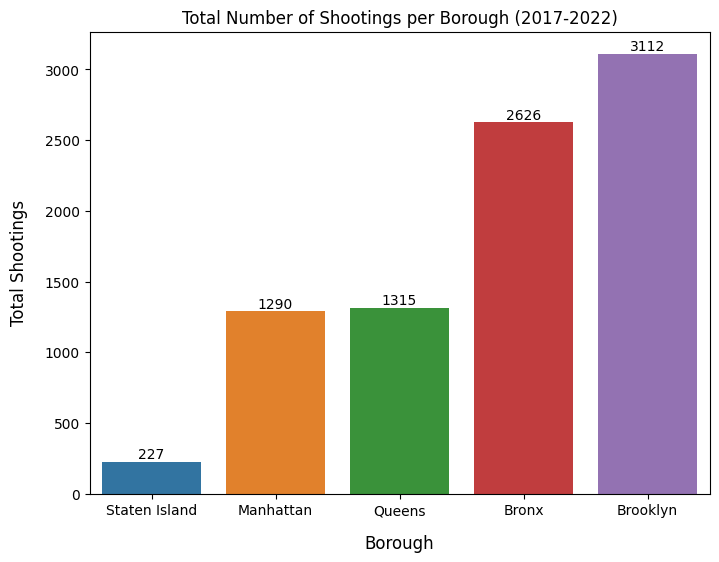

In [209]:
#plotting result of query that gets total number of shootings grouped by borough
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Borough',y='Total_Shootings',data=result)
plt.xlabel('Borough',fontsize=12,labelpad=12)
plt.ylabel('Total Shootings',fontsize=12,labelpad=12)
plt.title('Total Number of Shootings per Borough (2017-2022)')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

- Brooklyn had the most shootings with 3112
- Bronx had the second most shootings with 2626
- Queen had the third most shootings with 1315
- Manhattan had the 4th most shootings with 1290
- Staten Island had the least shootings with 227

### Question 2: How many total shootings each year?

In [210]:
#query to retrieve the total number of shootings each year
query='''SELECT strftime('%Y',i.OCCUR_DATE) AS Year, COUNT(1) AS Total_Shootings
         FROM INCIDENTS AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1
         ORDER BY 1;
         '''

In [211]:
result=pd.read_sql_query(query,connection)
result

,Year,Total_Shootings
0,2017,970
1,2018,958
2,2019,967
3,2020,1948
4,2021,2011
5,2022,1716


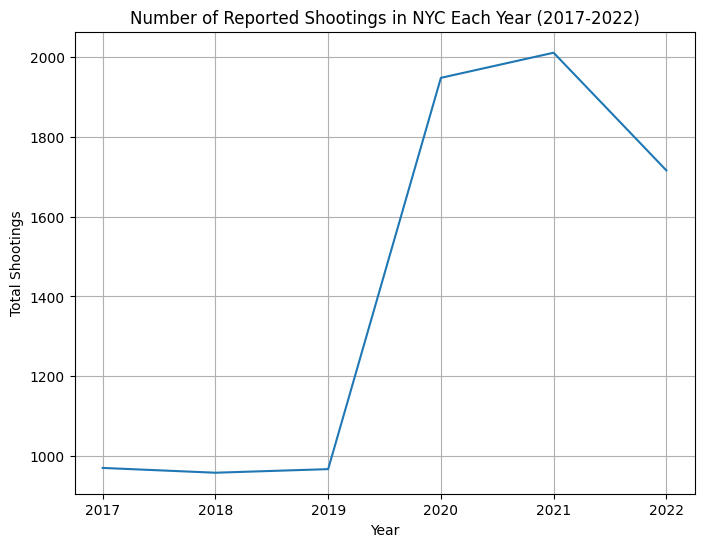

In [212]:
#plotting result of query that retrieves total shootings each year
plt.figure(figsize=(8,6))
plt.plot(result['Year'],result['Total_Shootings'])
plt.xlabel('Year')
plt.ylabel('Total Shootings')
plt.title('Number of Reported Shootings in NYC Each Year (2017-2022)')
plt.grid(True)
plt.show()

In 2017-2019, the number of shootings was pretty constant being just below a 1,000. Then there was a huge spike in shootings in 2020 when the number of total shootings doubled. In 2021 there was a slight increase, and the shootings started dropping in 2022.

My hypothesis for the drastic increase in shootings between 2019 and 2020 is due to the Covid pandemic that hit NYC in 2020. It matches the timeline and also Covid has settled down now in 2022 which can explain the dip in shootings in 2022. It would make sense for shootings to spike during the pandemic since it limited police activity.

### Question 2.1: How many shootings per borough for each year?

In [213]:
#query for the count of total shootings each year grouped by borough 
query='''SELECT i.BORO AS Borough,strftime('%Y',i.OCCUR_DATE) AS Year, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         GROUP BY 1,2
         '''

In [214]:
result=pd.read_sql_query(query,connection)
result

,Borough,Year,Total_Shootings
0,Bronx,2017,306
1,Bronx,2018,313
2,Bronx,2019,267
3,Bronx,2020,504
4,Bronx,2021,701
5,Bronx,2022,535
6,Brooklyn,2017,357
7,Brooklyn,2018,365
8,Brooklyn,2019,372
9,Brooklyn,2020,819


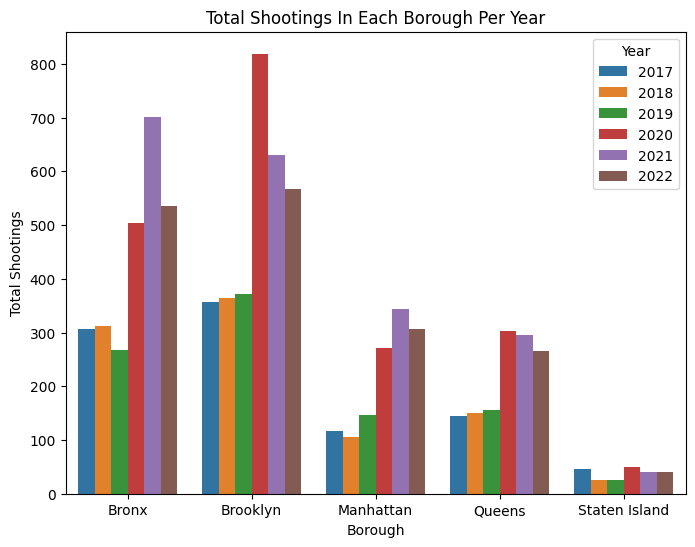

In [215]:
#plotting the result of query that gets the total shootings each year by borough
plt.figure(figsize=(8,6))
sns.barplot(data=result,x='Borough',y='Total_Shootings',hue='Year')
plt.xlabel('Borough')
plt.ylabel('Total Shootings')
plt.title('Total Shootings In Each Borough Per Year')
plt.show()

For the first 3 years in Bronx, Brooklyn, Manhattan and Queens, the number of shootings are pretty still (no drastic changes). Then for 2020, there is a noticeable increase in the number of shootings (especially for Brooklyn, more than double the shootings from 2019). For the boroughs 2020 or 2021 is the peak year with the most shootings, and in 2022 the numbers starts to drop. This behaviour follows the same pattern as our previous line graph that showed number of shootings over the years. Staten Island is the only case that is different since it doesn't have many shootings each year so the shooting numbers don't experience any drastic changes.

### Question 3: Is there a monthly pattern in shootings for each year?

In [216]:
#query to group total shootings by year,month
query ="""
    SELECT strftime('%Y',i.OCCUR_DATE) AS Year,strftime('%m',i.OCCUR_DATE) AS Month, COUNT(1) AS Total_Shootings
    FROM Incidents AS i
    JOIN Shootings AS s
    ON i.INCIDENT_KEY=s.INCIDENT_KEY
    GROUP BY 1,2
    ORDER BY 1,2;
    """

In [217]:
result=pd.read_sql_query(query,connection)
result

,Year,Month,Total_Shootings
0,2017,01,68
1,2017,02,48
2,2017,03,56
3,2017,04,81
4,2017,05,88
...,...,...,...
67,2022,08,154
68,2022,09,156
69,2022,10,103
70,2022,11,101


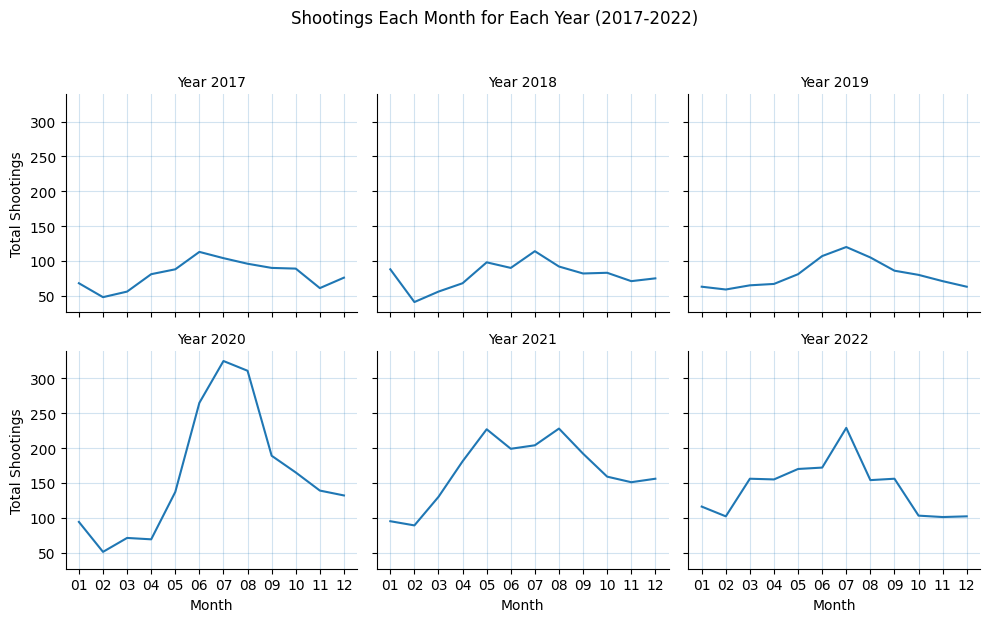

In [218]:
#using the result query to create subplots for each year, each subplot contains shootings for each month
g = sns.FacetGrid(result, col="Year", col_wrap=3)
g.map_dataframe(sns.lineplot, x="Month", y="Total_Shootings")
g.set_axis_labels("Month", "Total Shootings")
g.set_titles("Year {col_name}")
g.map(plt.grid, linestyle='-', alpha=0.2)
g.fig.suptitle("Shootings Each Month for Each Year (2017-2022)", y=1.03)
g.fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()


There is a very noticeable bellcurve like pattern in all the graphs. This is probably due to the fact that the number of shootings starts off low in Janurary and increases till it peaks around July. After the peak the shootings start to decrease again, and by the end of the year the number of shootings is relativley similar to what it was at the start of the year.  

The only difference is the first three years there are a lot less shootings so line lays towards the lower end of the graph and the peak is a lot shorter than the last three years. 

Summer season is definitely when shootings peak while winter season is the lowest point in terms of shootings. Fall season is when shootings start to fall off after the peak while Spring season is the time when shootings start to slowly increase towards the peak.

### Question 4: What is the deadliest shooting incident/incidents?

What I consider as the deadliest shooting incident is the incident resulting in the most number of deaths. I will consider two or more incidents that have the same number of deaths but also the highest deaths all to be considered the deadliest shooting incident. In order to do this I will be using the dense rank function to account for ties at number 1. So there might be more than one "deadliest shooting incident".

In [219]:
#query that gets the incident key and number of deaths ordered in descending order by number of deaths
query='''SELECT INCIDENT_KEY,COUNT(1) AS Deaths
         FROM Shootings
         WHERE STATISTICAL_MURDER_FLAG==1
         GROUP BY 1
         ORDER BY 2 DESC
         '''

In [220]:
result=pd.read_sql_query(query,connection)
result

,INCIDENT_KEY,Deaths
0,173354054,9
1,244608249,6
2,215776333,6
3,215034244,6
4,212640102,6
...,...,...
1283,161644004,1
1284,161644003,1
1285,161448634,1
1286,161078122,1


In [221]:
#creating a rank column for the result, that uses dense rank over deaths in descending order
result['Rank']=result['Deaths'].rank(method='dense',ascending=False)

In [222]:
result

,INCIDENT_KEY,Deaths,Rank
0,173354054,9,1.0
1,244608249,6,2.0
2,215776333,6,2.0
3,215034244,6,2.0
4,212640102,6,2.0
...,...,...,...
1283,161644004,1,7.0
1284,161644003,1,7.0
1285,161448634,1,7.0
1286,161078122,1,7.0


In [223]:
#filtering to only row/rows with rank 1, in order to get the incident key/keys for the deadliest shooting
#incident/incidents
result=result[result['Rank']==1]
result

,INCIDENT_KEY,Deaths,Rank
0,173354054,9,1.0


Only one incident was ranked number 1, so there were no ties for deadliest incident

In [224]:
#creating a sqlite table called Deadliest_Incident from the previous result dataframe that contains the 
#incident key and deaths for the deadliest shooting incident

table_name='Deadliest_Incident'
result.to_sql(table_name, connection, if_exists='replace', index=False)

1

In [225]:
#query that gets the date/time,location,total_victims and deaths for the deadliest incident
#by joining the Incidents,Deadliest_Incident and Shootings tables.
query='''SELECT i.OCCUR_DATE,i.OCCUR_TIME,i.BORO,i.PRECINCT,d.Deaths,
    COUNT(1) AS Total_Victims
    FROM Incidents AS i
    JOIN Deadliest_Incident AS d
    ON i.INCIDENT_KEY=d.INCIDENT_KEY
    JOIN Shootings AS s
    ON d.INCIDENT_KEY=s.INCIDENT_KEY
    '''
         
        

In [226]:
result=pd.read_sql_query(query,connection)
result

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,Deaths,Total_Victims
0,2018-01-06,21:05:00,Bronx,47,9,18


The deadliest shooting in NYC in the years (2017-2022) occurred on Janurary 6, 2018 at around 9:05pm in the Bronx. There were 18 total victims and 9 them of died. The incident occurred in the 47th precinct which serves the northern portion of the Bronx, which includes neighborhoods like Woodlawn, Willaimsbridge, Baychester and Woodlawn Cemetary.

### Question 5: What is the distribution of shootings by hour for 2022?

In [227]:
#query to retrieve total shootings grouped by hour 
query='''SELECT strftime('%H',i.OCCUR_TIME) AS Hour, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1'''

In [228]:
result=pd.read_sql_query(query,connection)
result

,Hour,Total_Shootings
0,00,133
1,01,99
2,02,85
3,03,89
4,04,67
5,05,35
6,06,34
7,07,11
8,08,32
9,09,18


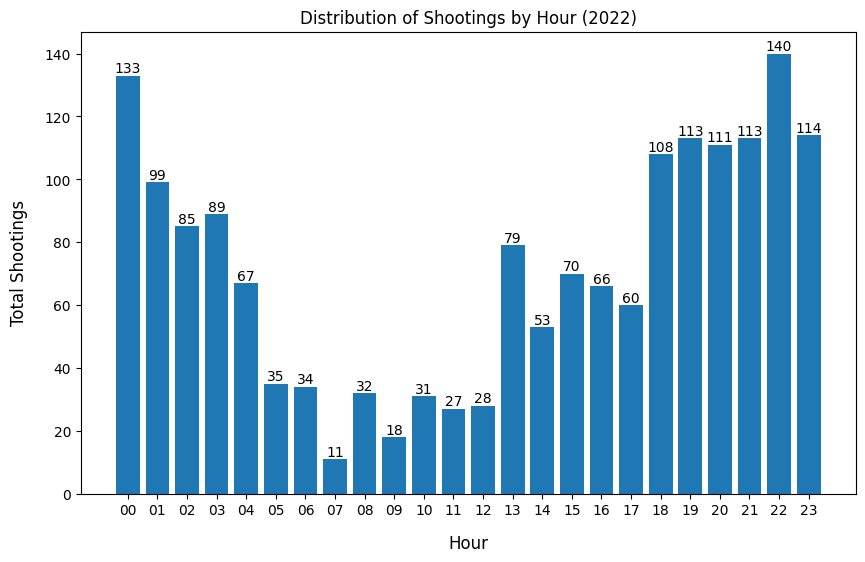

In [229]:
#plotting the result of query that retreives total shootings by hour
plt.figure(figsize=(10,6))
bars=plt.bar(result['Hour'].values,result['Total_Shootings'].values)
plt.xlabel('Hour',fontsize=12,labelpad=12)
plt.ylabel('Total Shootings',fontsize=12,labelpad=12)
plt.title('Distribution of Shootings by Hour (2022)')
plt.bar_label(bars,label_type='edge')
plt.show()

The peak time window of shootings is from the evening to midnight (6pm-12am). The middle of the night (1am-3am) is also a time where lot of shootings occur but not peak. The safest hours are from morning to noon (5am-12pm) where shootings are the lowest. In the afternoon (1pm-5pm), there is still a good number of shootings to be cautious about.

### Question 6: What is the distribution of shootings based on victim and perpetrator demographics for 2022?


#### Distribution of Shootings By Victim Race

In [230]:
#query to retrieve total number of victims grouped by race in 2022
query='''SELECT s.VIC_RACE, COUNT(1) AS Total_Shootings
         FROM Shootings AS s
         JOIN Incidents AS i
         ON s.INCIDENT_KEY=i.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022' 
         GROUP BY 1
         ORDER BY 2 DESC;'''

In [231]:
result=pd.read_sql_query(query,connection)
result

,VIC_RACE,Total_Shootings
0,BLACK,1158
1,WHITE HISPANIC,307
2,BLACK HISPANIC,161
3,ASIAN / PACIFIC ISLANDER,50
4,WHITE,38
5,UNKNOWN,1
6,AMERICAN INDIAN/ALASKAN NATIVE,1


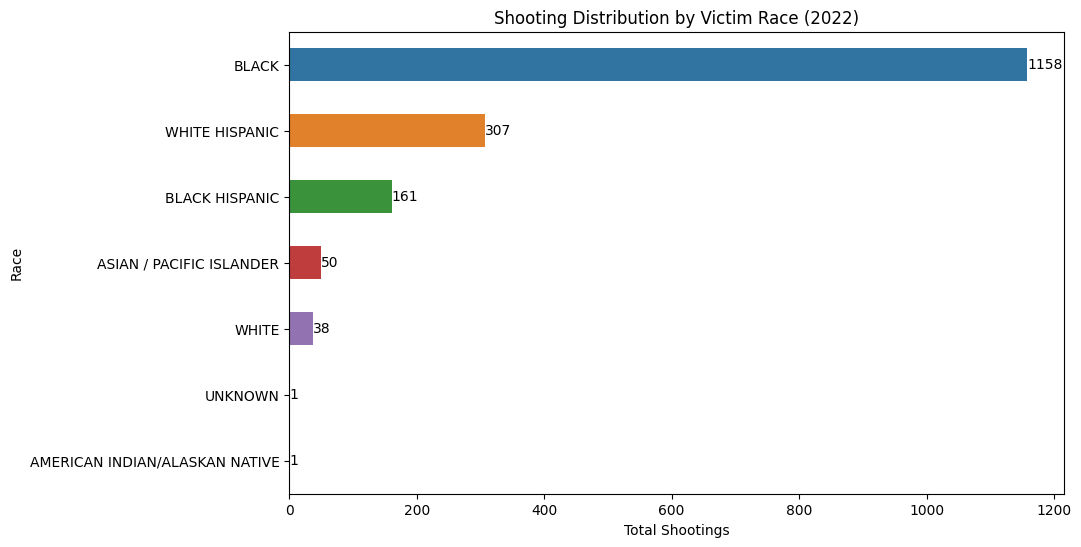

In [232]:
#plotting the result of the query that gets total number of victims grouped by race
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Total_Shootings',y='VIC_RACE',data=result,width=.5,dodge=False,orient='h',)
plt.xlabel('Total Shootings')
plt.ylabel('Race')
plt.title('Shooting Distribution by Victim Race (2022)')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

- About 64% of the total shootings in 2022 involved a victim who was black
- 307 shootings involved a victim who was white hispanic, not a significant amount of the total (about 18%).
- Black Hispanic, Asian/Pacific Islander, White and American Indian/Alaskan Native victims (only 250 shootings combined) make up a small portion of the total shootings
- There was one shooting where the victim's race was unknown.

#### Distribution Of Shootings by Victim Age Group

In [233]:
#query to retrieve total number of victims grouped by age group in 2022
query='''SELECT s.VIC_AGE_GROUP, COUNT(1) AS Total_Shootings
         FROM Shootings AS s
         JOIN Incidents AS i
         ON s.INCIDENT_KEY=i.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022' 
         GROUP BY 1;'''

In [234]:
result=pd.read_sql_query(query,connection)
result

,VIC_AGE_GROUP,Total_Shootings
0,18-24,482
1,25-44,895
2,45-64,165
3,65+,14
4,<18,158
5,UNKNOWN,2


The VIC_AGE_GROUP columns are ordered wrong, <18 should be at the front, that should be fixed.

In [235]:
#creating a reference to the values in the 5th row that contains the age group <18, 
#remember that dataframes are 0 indexed so 4 here is actually referencing the 5th row

row=result.loc[4]

In [236]:
#dropping the 5th row from the result dataframe
result=result.drop(4)

In [237]:
#concatting the row referencing <18 age group with the result dataframe, so that the row with <18 age group
#is in the front
result=pd.concat([row.to_frame().T,result],ignore_index=True)
result

,VIC_AGE_GROUP,Total_Shootings
0,<18,158
1,18-24,482
2,25-44,895
3,45-64,165
4,65+,14
5,UNKNOWN,2


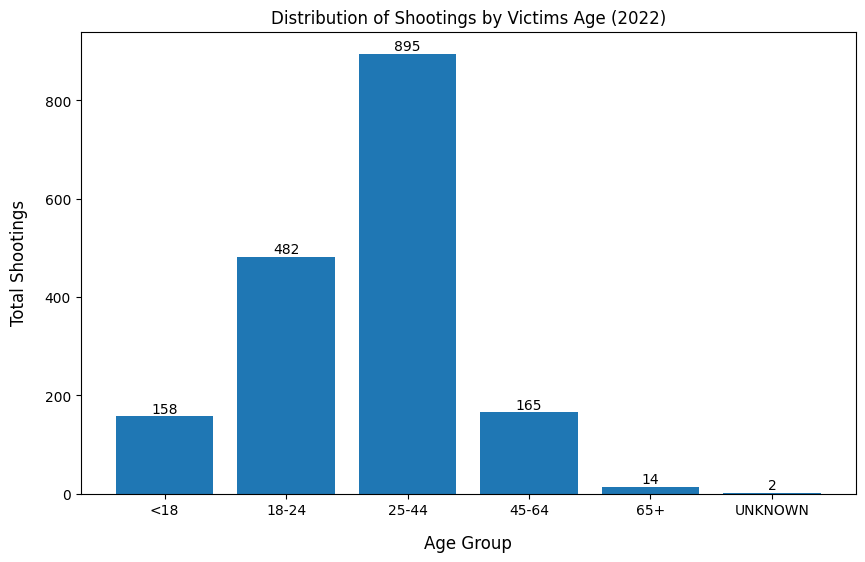

In [238]:
#plotting the result of the query that gets the total number of victims by age group
plt.figure(figsize=(10,6))
bars=plt.bar(result['VIC_AGE_GROUP'].values,result['Total_Shootings'].values)
plt.xlabel('Age Group',fontsize=12,labelpad=12)
plt.ylabel('Total Shootings',fontsize=12,labelpad=12)
plt.title('Distribution of Shootings by Victims Age (2022)')
plt.bar_label(bars,label_type='edge')
plt.show()

- A little more than half the total shootings in 2022, involved a victim in the age group (25-44)
- About 28% of shootings involved a victim in the age group (18-24)
- It's a little disheartening to know that in 158 shootings in 2022, the victim was below the age of 18
- Just under 10% of the shootings, involved a victim who was in the age group (45-64)
- There is barely any shootings (only 14) where the victim was 65+
- There are 2 shootings where the victim's age is unknown.

#### Distribution of Shootings by Victim Sex

In [239]:
#query to count number of victims grouped by sex/gender for the year 2022
query='''SELECT s.VIC_SEX, COUNT(1) AS Total_Shootings
         FROM Shootings AS s
         JOIN Incidents AS i
         ON s.INCIDENT_KEY=i.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022' 
         GROUP BY 1
         ORDER BY 2 DESC;'''

In [240]:
result=pd.read_sql_query(query,connection)
result

,VIC_SEX,Total_Shootings
0,M,1504
1,F,212


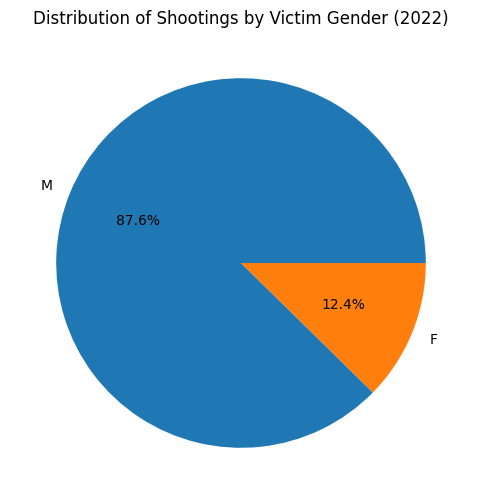

In [241]:
#plotting the result of query that gets total number of victims grouped by gender
plt.figure(figsize=(6,6))
plt.pie(result['Total_Shootings'],labels=result['VIC_SEX'],autopct='%1.1f%%')
plt.title('Distribution of Shootings by Victim Gender (2022)')
plt.show()

In most shootings, the victim is a male
- 88% of shootings involved a victim that was male
- 12% of shootings involved a victim that was female

#### Distribution of Shooting by Perpetrator Race

In [242]:
#query to get total perpetrators grouped by race
query='''SELECT s.PERP_RACE, COUNT(1) AS Total_Shootings
         FROM Shootings AS s
         JOIN Incidents AS i
         ON s.INCIDENT_KEY=i.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022' 
         GROUP BY 1
         ORDER BY 2 DESC;'''

In [243]:
result=pd.read_sql_query(query,connection)
result

,PERP_RACE,Total_Shootings
0,BLACK,764
1,UNKNOWN,640
2,WHITE HISPANIC,177
3,BLACK HISPANIC,111
4,ASIAN / PACIFIC ISLANDER,13
5,WHITE,11


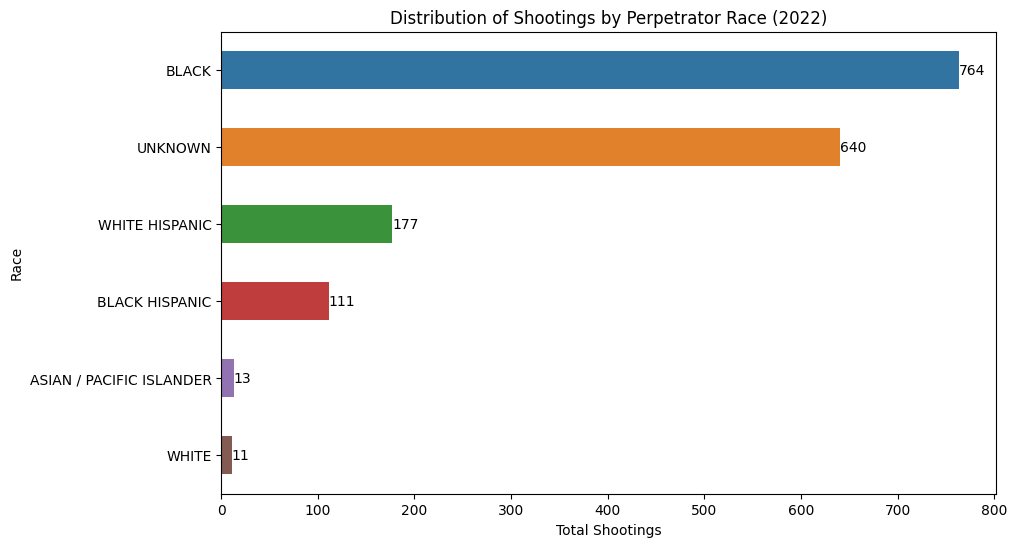

In [244]:
#plotting the result of the query that gets total number of perpetrator grouped by race
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Total_Shootings',y='PERP_RACE',data=result,width=.5,dodge=False,orient='h',)
plt.xlabel('Total Shootings')
plt.ylabel('Race')
plt.title('Distribution of Shootings by Perpetrator Race (2022)')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

- In 640 of the shootings (about 37% of the total shootings in 2022), the perpetrator/shooter race was unknown. (The perpetrator was probably not identified or caught)
- The majority of shootings (where the shooter is identified) involved a shooter who was black.
- Only 17% of shootings involved a shooter who was either white or black hispanic.
- There are very few shootings where the shooter is White or Asian/Pacific Islander. (only 24 shootings combined)

#### Distribution of Shootings by Perpetrator Age Group

In [245]:
#query to get number of perpetrators grouped by age group
query='''SELECT s.PERP_AGE_GROUP, COUNT(1) AS Total_Shootings
         FROM Shootings AS s
         JOIN Incidents AS i
         ON s.INCIDENT_KEY=i.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022' 
         GROUP BY 1;'''

In [246]:
result=pd.read_sql_query(query,connection)
result

,PERP_AGE_GROUP,Total_Shootings
0,18-24,378
1,25-44,485
2,45-64,82
3,65+,3
4,<18,128
5,UNKNOWN,640


The PERP_AGE_GROUP columns are ordered wrong, <18 should be at the front, that should be fixed.

In [247]:
#creating a reference to the values in the 5th row that contains the age group <18, remember that 
#dataframes are 0 indexed so 4 here is actually referencing the 5th row

row=result.loc[4]

In [248]:
#dropping the 5th row from the result dataframe
result=result.drop(4)

In [249]:
#concatting the row referencing <18 age group with the result dataframe, so that the row with <18 age group
#is in the front
result=pd.concat([row.to_frame().T,result],ignore_index=True)
result

,PERP_AGE_GROUP,Total_Shootings
0,<18,128
1,18-24,378
2,25-44,485
3,45-64,82
4,65+,3
5,UNKNOWN,640


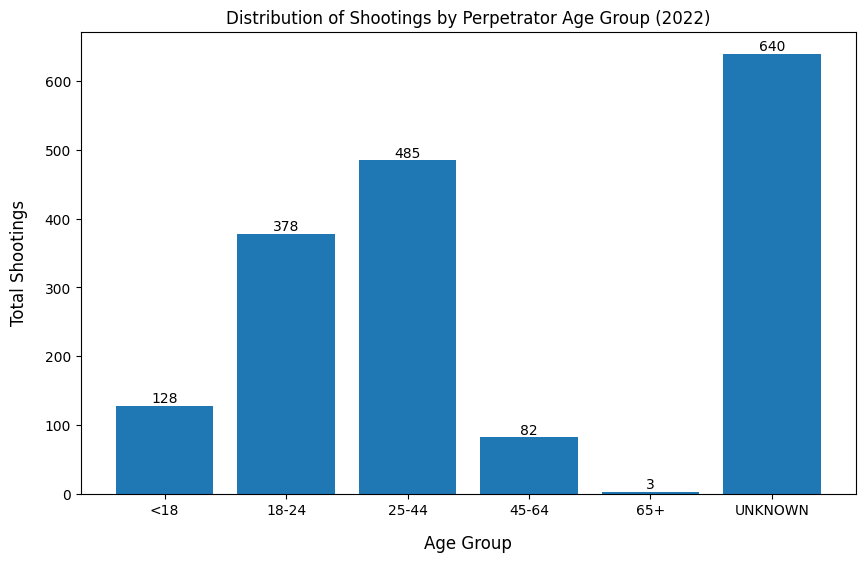

In [250]:
#plotting the result of the query that gets the total number of victims by age group
plt.figure(figsize=(10,6))
bars=plt.bar(result['PERP_AGE_GROUP'].values,result['Total_Shootings'].values)
plt.xlabel('Age Group',fontsize=12,labelpad=12)
plt.ylabel('Total Shootings',fontsize=12,labelpad=12)
plt.title('Distribution of Shootings by Perpetrator Age Group (2022)')
plt.bar_label(bars,label_type='edge')
plt.show()

- In 640 of the shootings, the shooter's age group is unknown just like with the previous graph which looked at race. (This further backs the idea that the shooters were not identified or were not caught)
- Overall the the majority of shootings (where the shooter is identified) involved a shooter who was either (18-24) or (25-44).
- There are 128 shootings that involved a shooter that was under 18, I think that is very worrisome that there are even over a 100 shootings where the shooter is a teen.
- There aren't many shootings (only 85 combined) where the shooter is in the age groups (45-64) or 65+.

#### Distribution of Shootings by Perpetrator Sex

In [251]:
#query to get number of shootings grouped by perpetrator's sex/gender
query='''SELECT s.PERP_SEX, COUNT(1) AS Total_Shootings
         FROM Shootings AS s
         JOIN Incidents AS i
         ON s.INCIDENT_KEY=i.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022' 
         GROUP BY 1
         ORDER BY 2 DESC;'''

In [252]:
result=pd.read_sql_query(query,connection)
result

,PERP_SEX,Total_Shootings
0,M,1023
1,U,640
2,F,53


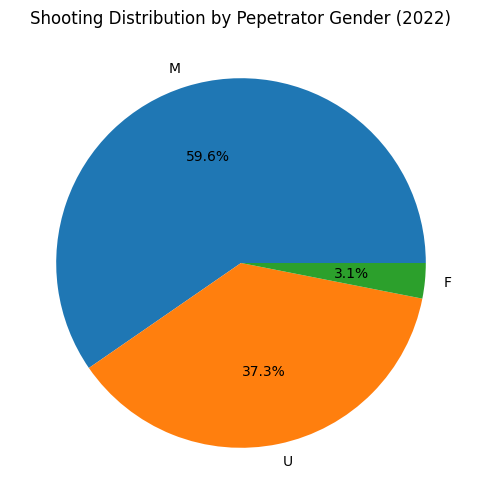

In [253]:
#plotting result for query that gets number of perpetrators grouped by gender
plt.figure(figsize=(6,6))
plt.pie(result['Total_Shootings'],labels=result['PERP_SEX'],autopct='%1.1f%%')
plt.title('Shooting Distribution by Pepetrator Gender (2022)')
plt.show()

- About 37 percent of the reported shootings, the race of the shooter is unknown
- About 60 percent of the reported shootings involved a male shooter
- Only 3 percent of the reported shootings involved a female shooter

### Question 7: What are the top 5 precincts with the most shootings (2022)?

Precincts with the same number of shootings will share the same rank. So there will be a possiblity of ties for precincts in the ranks 1-5 in terms of most shootings. I will be using dense rank to handle ties.

In [254]:
#query to get total shootings grouped by precinct, ordered in descending order by total shootings
query='''SELECT i.PRECINCT, COUNT(1) AS Total_Shootings
         FROM Incidents AS i
         JOIN Shootings AS s
         ON i.INCIDENT_KEY=s.INCIDENT_KEY
         WHERE strftime('%Y',i.OCCUR_DATE)=='2022'
         GROUP BY 1
         ORDER BY 2 DESC
         '''

In [255]:
result=pd.read_sql_query(query,connection)
result

,PRECINCT,Total_Shootings
0,75,87
1,73,80
2,48,72
3,44,71
4,40,71
...,...,...
69,112,3
70,111,3
71,17,3
72,1,3


In [256]:
#creating a rank column for the result, that uses dense rank over total shootings in descending order
result['Rank']=result['Total_Shootings'].rank(method='dense',ascending=False)

In [257]:
#filtering to only have rows with ranks 5 or below
result=result[result['Rank']<=5]
result

,PRECINCT,Total_Shootings,Rank
0,75,87,1.0
1,73,80,2.0
2,48,72,3.0
3,44,71,4.0
4,40,71,4.0
5,25,61,5.0


Precint 44 and 40 ended up having the same number of shootings and will both be the 4th ranked Precinct with the most shootings.

In [258]:
#change precinct column to a string type for the result dataframe so when plotting the precincts, the plotting library
#won't confuse it for a number and try to reorder things

result.loc[:,'PRECINCT']=result['PRECINCT'].astype(str)

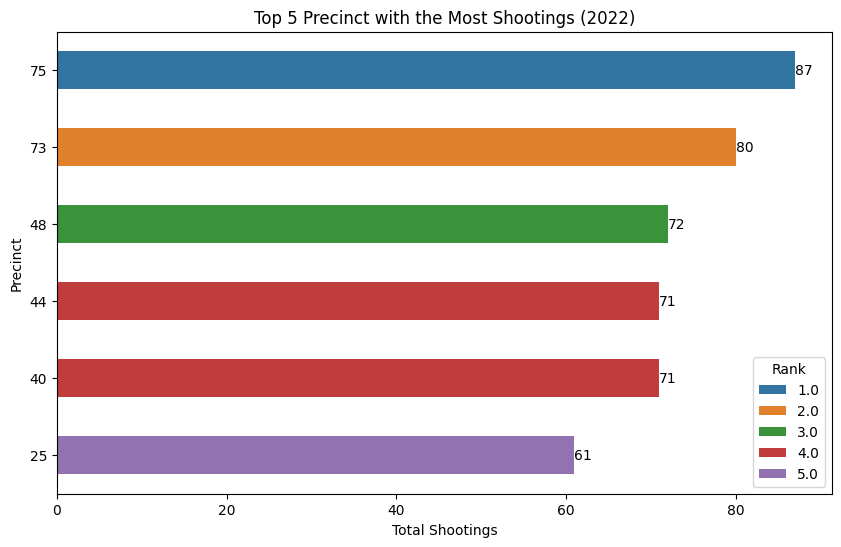

In [259]:
#plotting query result that gets the top 5 precincts with the most shootings using dense rank
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Total_Shootings',y='PRECINCT',hue='Rank',data=result,width=.5,dodge=False,orient='h')
plt.xlabel('Total Shootings')
plt.ylabel('Precinct')
plt.title('Top 5 Precinct with the Most Shootings (2022)')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

1. Precinct 75 with 87 shootings
2. Precinct 73 with 80 shootings
3. Precinct 48 with 72 shootings
4. Precincts tied for 4th with 71 shootings
    - Precinct 44
    - Preinct 40
5. Precinct 25 with 61 shootings

Here's some general info on the precincts above:

- The 75th precinct covers the easternmost area of Brooklyn, including East New York and Cypress Hill Neighborhoods
- The 73rd precinct covers the northeastern section of Brooklyn, which includes the neighborhoods of Brownsville and Ocean Hill
- The 48th precinct is located at the center of the Bronx, it includes the neighborhoods of Belmont, East Tremont, and West Farms
- The 44th precinct covers an area of about 1.97 square miles in the southwestern part of the Bronx, which includes notable landmarks like the Grand Concourse, Bronx Terminal Market and Yankee Stadium.
- The 40th precinct is situated at the southernmost point of the Bronx and is responsible for policing the neighborhoods of Port Morris, Mott Haven and Melrose.
- The 25th precinct covers the northern part of East Harlem, includes communities like Marcus Garvey Park, Harlem Art Park and the 125th Street Metro-North Station.

### Final Thoughts

After an analysis on this dataset, it is clear that shootings in NYC have definitely increased in recent years. I think the city needs to take action in some way. Some of the patterns that I found in this analysis could be a starting point. This is what I would do based on my findings:

1. Get more police stationed in the Bronx and Brooklyn, the two boroughs with the most shootings every year.
2. For the precincts with very hight shootings: 25,40,44,48,73,75, try to get more help from neighboring precincts that might have low criminal acitivity.
3. Have more police stationed towards the evening and midnight when the highest number of shootings occur, also during the summer season where shootings tend to peak in terms of by month.
4. Have a plan for when another pandemic hits NYC to prevent another surge in shootings like with how Covid did.
5. We need to do a better job educating teens on gun violence, the fact that in 2022 there were 128 shootings in NYC where the shooter was under 18 is not a good sign.
 

In [260]:
#close connection to sqlite3 database
connection.close()